1. drinks.csv 파일 로드
2. 결측치 확인
3. continent 컬럼이 결측치 존재 -> 결측치를 'OT'로 대체
4. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
5. 4개의 값들을 그래프로 표시 (바형 그래프)
6. totla_liter_pure_alcohol 컬럼의 평균보다 높은 contient가 어디인지 출력

In [285]:
import pandas as pd

In [286]:
drink = pd.read_csv("../csv/drinks.csv")

In [287]:
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [288]:

#결측치를 OT로 대체 .fillna()
drink["continent"] = drink["continent"].fillna("OT")

In [289]:
drink.head(6)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT


In [290]:
drink.groupby("continent").mean(["spirit_servings"])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
OT,145.434783,165.739130,24.521739,5.995652
SA,175.083333,114.750000,62.416667,6.308333


In [291]:
drink.groupby("continent").mean()["spirit_servings"]

C:\Users\신민경\AppData\Local\Temp\ipykernel_135972\822243374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drink.groupby("continent").mean()["spirit_servings"]


continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [292]:
# continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력 (mean,min, max, )
group=drink.groupby("continent").agg(['mean','min','max','sum'])["spirit_servings"]
group.head()

C:\Users\신민경\AppData\Local\Temp\ipykernel_135972\2728937907.py:2: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group=drink.groupby("continent").agg(['mean','min','max','sum'])["spirit_servings"]


,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [293]:
##시각화
import matplotlib.pyplot as plt

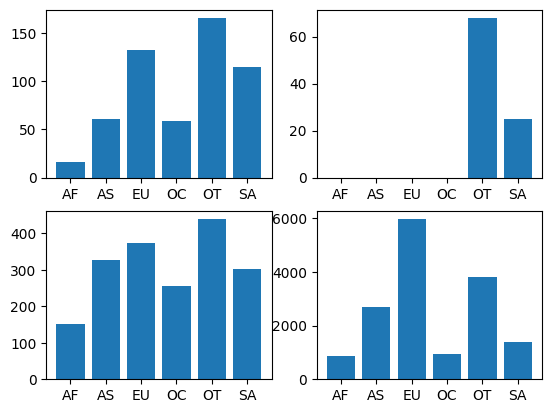

In [294]:
##4개의 그래프 subplot 이용하여 바형 그래프출력
#plt.bar(x, y, color=['y','g','b','r'],width=.4)

plt.subplot(2,2,1)
plt.bar(group.index, group["mean"])
plt.subplot(2,2,2)
plt.bar(group.index, group["min"])
plt.subplot(2,2,3)
plt.bar(group.index, group["max"])
plt.subplot(2,2,4)
plt.bar(group.index, group["sum"])
plt.show()

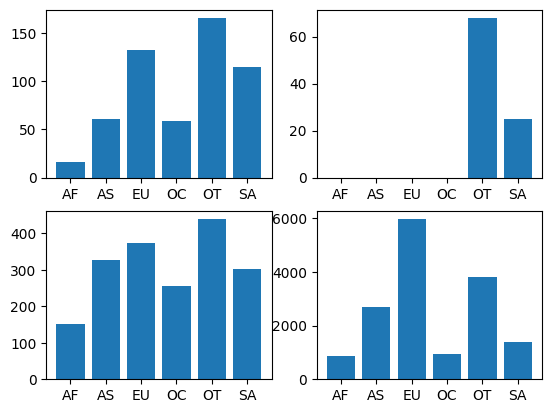

In [295]:
x = group.index
plt.subplot(2,2,1)
plt.bar(x, group["mean"])
plt.subplot(2,2,2)
plt.bar(x, group["min"])
plt.subplot(2,2,3)
plt.bar(x, group["max"])
plt.subplot(2,2,4)
plt.bar(x, group["sum"])
plt.show()

In [296]:
## 전체 술 소비량의 평균보다 높은 continent가 어디인가??

## continent 별 전체 술 소비량 평균을 구하는 데이터프레임 생성
group2=drink.groupby("continent").mean()["total_litres_of_pure_alcohol"]
group2

C:\Users\신민경\AppData\Local\Temp\ipykernel_135972\4238382940.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group2=drink.groupby("continent").mean()["total_litres_of_pure_alcohol"]


continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [297]:
## 전체 술 소비량의 평균
total_mean = drink.mean()["total_litres_of_pure_alcohol"]
total_mean

C:\Users\신민경\AppData\Local\Temp\ipykernel_135972\1009606346.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_mean = drink.mean()["total_litres_of_pure_alcohol"]


4.717098445595855

In [298]:
## 그룹화 데이터의 전체 술소비량의 평균이상인 값들을 출력 
group2[group2>=total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

내가 한 것!

In [299]:
cgroup = drink.groupby("continent")
cgroup


In [300]:

## min 괄호() 안에 넣지 않는 이유는 min()을 계산한 후에 값[]을 불러오기 때문에 
##cgrop 을 sum 하는 경우 min,max는 안됨-> 함수오류!!
cgroup["spirit_servings"].min()


continent
AF     0
AS     0
EU     0
OC     0
OT    68
SA    25
Name: spirit_servings, dtype: int64

In [301]:
cgroup.min()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
AF,Algeria,0,0,0,0.0
AS,Afghanistan,0,0,0,0.0
EU,Albania,0,0,0,0.0
OC,Australia,0,0,0,0.0
OT,Antigua & Barbuda,1,68,1,2.2
SA,Argentina,93,25,1,3.8


In [302]:
cgroup.max()["spirit_servings"]

continent
AF    152
AS    326
EU    373
OC    254
OT    438
SA    302
Name: spirit_servings, dtype: int64

In [303]:
cgroup.max(["spirit_servings"])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,376,152,233,9.1
AS,247,326,123,11.5
EU,361,373,370,14.4
OC,306,254,212,10.4
OT,285,438,100,11.9
SA,333,302,221,8.3


In [304]:
cgroup.mean()["spirit_servings"]

C:\Users\신민경\AppData\Local\Temp\ipykernel_135972\2703460647.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cgroup.mean()["spirit_servings"]


continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [305]:
cgroup.mean(["spirit_servings"])


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
OT,145.434783,165.739130,24.521739,5.995652
SA,175.083333,114.750000,62.416667,6.308333


In [306]:
cgroup.sum()["spirit_servings"]

C:\Users\신민경\AppData\Local\Temp\ipykernel_135972\3517329391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cgroup.sum()["spirit_servings"]


continent
AF     866
AS    2677
EU    5965
OC     935
OT    3812
SA    1377
Name: spirit_servings, dtype: int64

In [330]:
drink.head(4)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU


In [327]:
ccgroup = drink.groupby("continent")
ccgroup


In [329]:
ccgroup.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
11,Bahamas,122,176,51,6.3,OT


In [313]:
ccgroup.sort_values(["spirit_servings"], ascending=False).head(1)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [314]:
ccgroup.sort_values(["spirit_servings"]).head(1)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'